In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df=df.set_index('Person ID')
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df.value_counts('Occupation')

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


In [6]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


AttributeError: QuadMesh.set() got an unexpected keyword argument 'size'

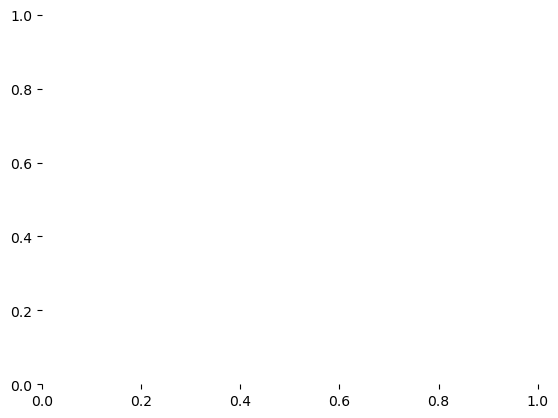

In [6]:
cols = ['Quality of Sleep','Sleep Duration','Stress Level','Age','Physical Activity Level','Heart Rate','Daily Steps']
hm = sns.heatmap(df[cols].corr(),
                 cbar=True,
                 annot=True,
                 size=(10,10)
            )

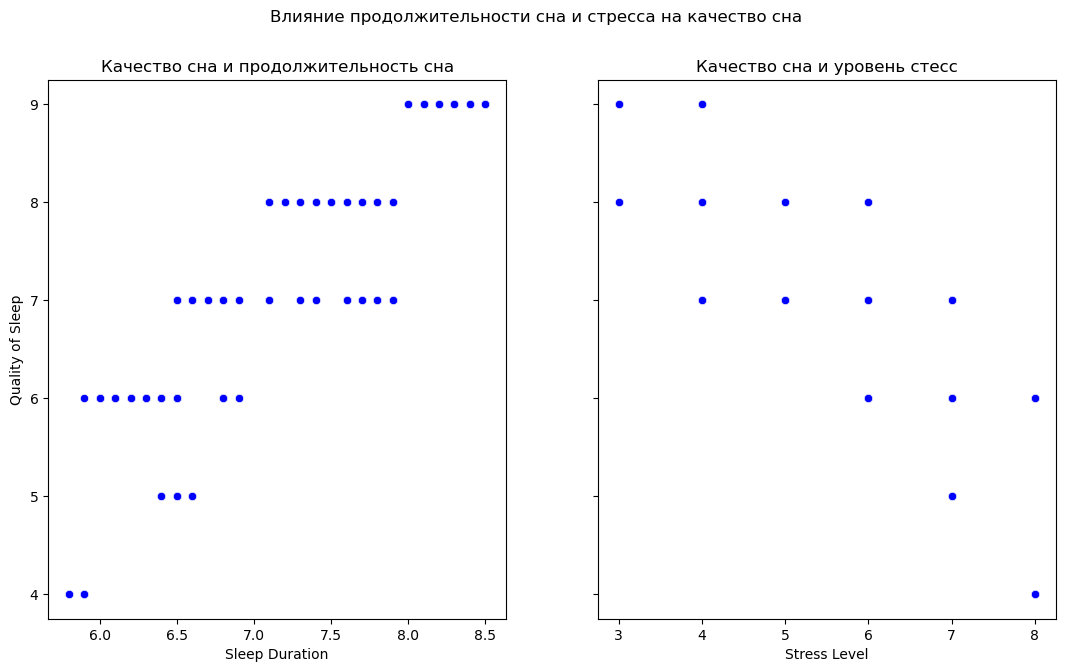

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(13, 7), sharey=True)
fig.suptitle('Влияние продолжительности сна и стресса на качество сна')

sns.scatterplot(ax=axes[0], x=df['Sleep Duration'], y=df['Quality of Sleep'],color='blue')
axes[0].set_title("Качество сна и продолжительность сна")

sns.scatterplot(ax=axes[1], x=df['Stress Level'], y=df['Quality of Sleep'],color='blue')
axes[1].set_title("Качество сна и уровень стесс")

plt.show()


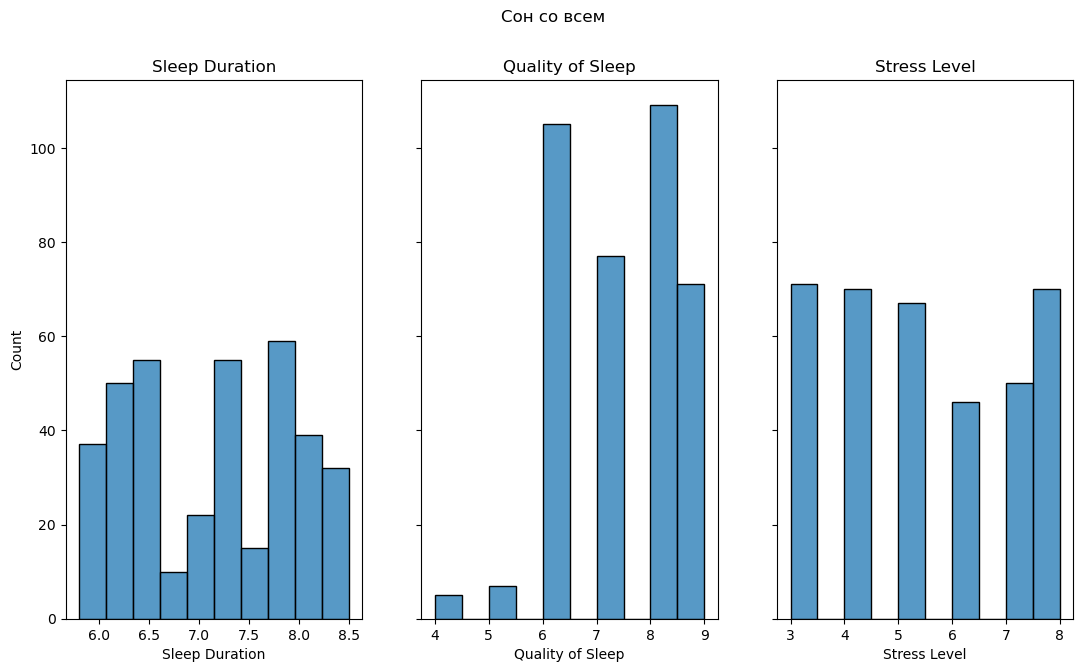

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(13, 7), sharey=True)
fig.suptitle('Сон со всем')

sns.histplot(ax=axes[0], x=df['Sleep Duration'])
axes[0].set_title("Sleep Duration")

sns.histplot(ax=axes[1], x=df['Quality of Sleep'])
axes[1].set_title("Quality of Sleep")

sns.histplot(ax=axes[2], x=df['Stress Level'])
axes[2].set_title("Stress Level")

plt.show()


In [10]:
y=df['Quality of Sleep']
x1=df['Stress Level']
x2=df['Sleep Duration']

x1=sm.add_constant(x1)
x2=sm.add_constant(x2)


m1=sm.OLS(y, x1).fit()

m2=sm.OLS(y, x2).fit()



print(m1.summary())


                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1563.
Date:                Mon, 10 Jun 2024   Prob (F-statistic):          2.88e-135
Time:                        21:56:58   Log-Likelihood:                -289.06
No. Observations:                 374   AIC:                             582.1
Df Residuals:                     372   BIC:                             590.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           10.5774      0.087    121.678   


cols = ['Quality of Sleep','Sleep Duration','Stress Level'] ( сюда колонки )
hm = sns.heatmap(df[cols].corr(),
                 cbar=True,
                 annot=True)

<Axes: xlabel='Stress Level', ylabel='Quality of Sleep'>

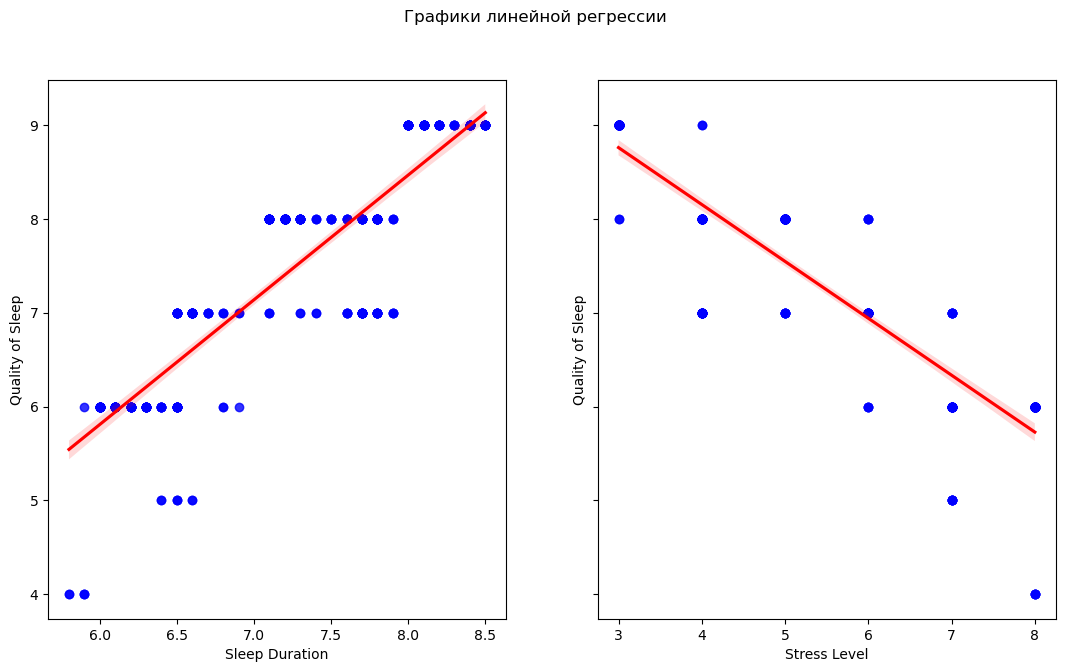

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(13, 7), sharey=True)
fig.suptitle('Графики линейной регрессии')

sns.regplot(ax=axes[0],x="Sleep Duration", y="Quality of Sleep", data=df,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
sns.regplot(ax=axes[1],x="Stress Level", y="Quality of Sleep", data=df,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

In [12]:


print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     1319.
Date:                Mon, 10 Jun 2024   Prob (F-statistic):          2.17e-124
Time:                        21:56:58   Log-Likelihood:                -314.22
No. Observations:                 374   AIC:                             632.4
Df Residuals:                     372   BIC:                             640.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.1634      0.262     -8.

In [13]:
y=df['Quality of Sleep']
x_2=df[['Stress Level','Sleep Duration']]

x_2=sm.add_constant(x_2)
m_2=sm.OLS(y, x_2).fit()
print(m_2.summary())

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1327.
Date:                Mon, 10 Jun 2024   Prob (F-statistic):          9.20e-170
Time:                        21:56:59   Log-Likelihood:                -205.05
No. Observations:                 374   AIC:                             416.1
Df Residuals:                     371   BIC:                             427.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.4118      0.431     10.

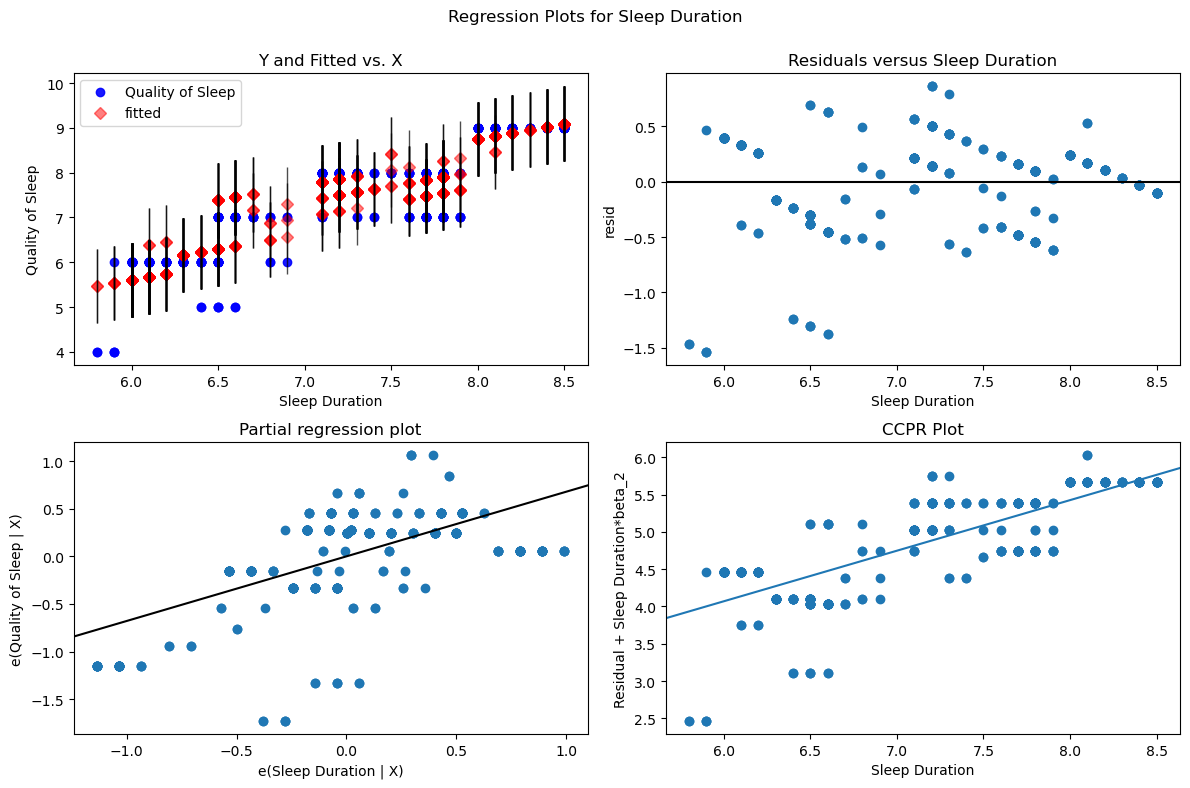

In [14]:
fig = plt.figure(figsize=(12,8))

#produce residual plots
fig = sm.graphics.plot_regress_exog(m_2,'Sleep Duration',fig=fig)

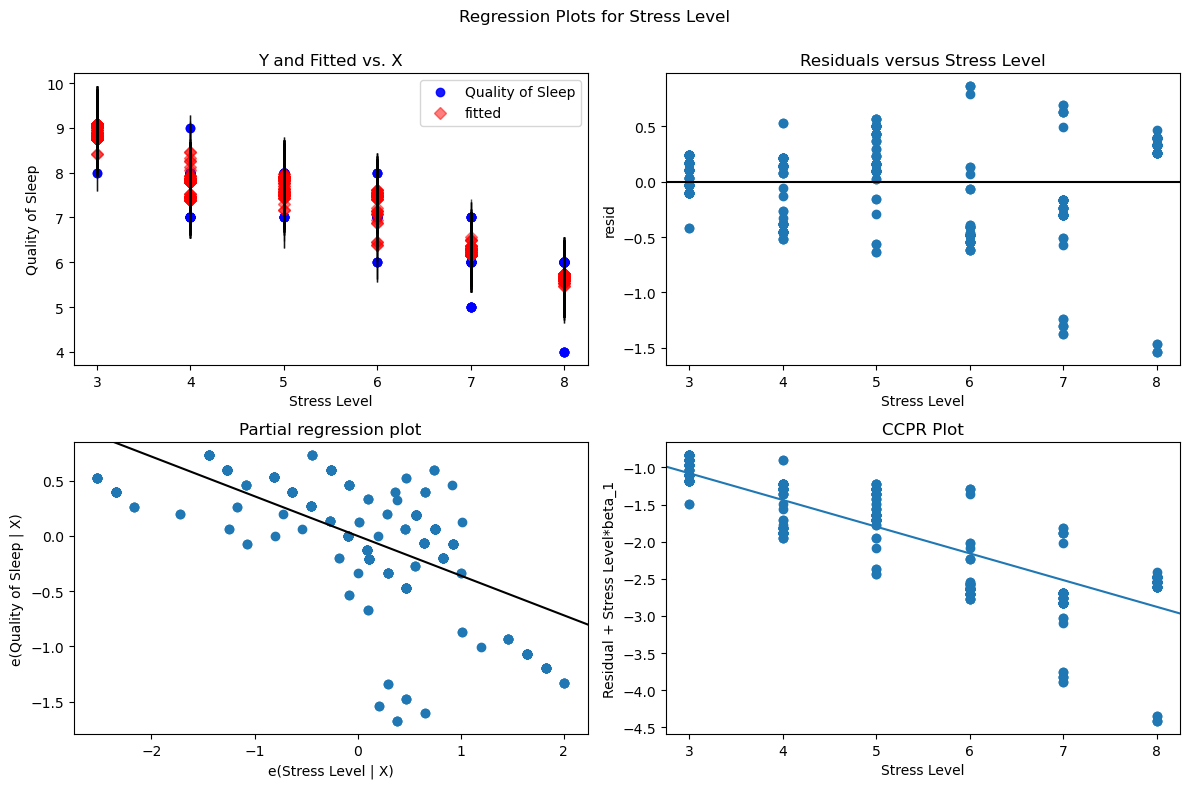

In [15]:
fig = plt.figure(figsize=(12,8))

#produce residual plots
fig = sm.graphics.plot_regress_exog(m_2,'Stress Level',fig=fig)

In [16]:
y=df['Quality of Sleep']
x_all=df[['Sleep Duration','Stress Level','Age','Heart Rate','Daily Steps']]

x_all=sm.add_constant(x_all)
m_all=sm.OLS(y, x_all).fit()
print(m_all.summary())

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     735.8
Date:                Mon, 10 Jun 2024   Prob (F-statistic):          4.21e-189
Time:                        21:57:00   Log-Likelihood:                -149.07
No. Observations:                 374   AIC:                             310.1
Df Residuals:                     368   BIC:                             333.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.4380      0.528     10.

In [17]:
Y=(5.4380+0.6350*df['Sleep Duration']-0.3129*df['Stress Level']
   +0.0141*df['Age']-0.0303*df['Heart Rate'])

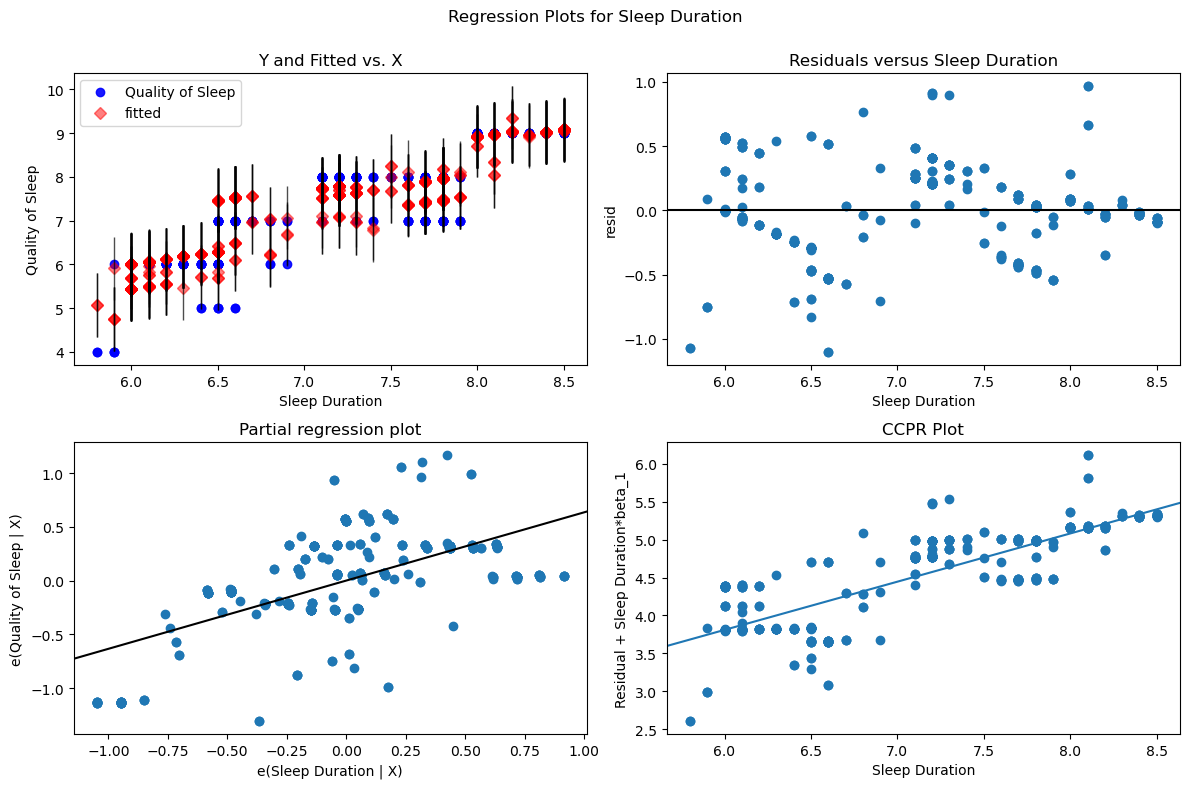

In [18]:
fig = plt.figure(figsize=(12,8))

#produce residual plots
fig = sm.graphics. plot_regress_exog (m_all,'Sleep Duration',fig=fig)


https://www.statsmodels.org/stable/generated/statsmodels.graphics.regressionplots.plot_regress_exog.html

In [19]:
df.value_counts('BMI Category')

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [20]:

df['BULL BMI Category']=df['BMI Category'].apply(lambda s: 1 if(s=='Normal')|(s=='Normal Weight') else 0 )
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BULL BMI Category
Person ID,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,0
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,1
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,1
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,0
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0


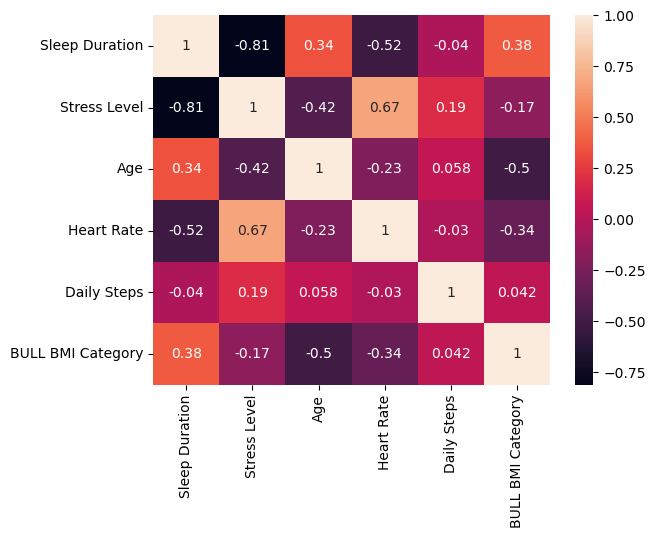

In [21]:
cols = ['Sleep Duration','Stress Level','Age','Heart Rate','Daily Steps','BULL BMI Category']
hm = sns.heatmap(df[cols].corr(),
                 cbar=True,
                 annot=True)

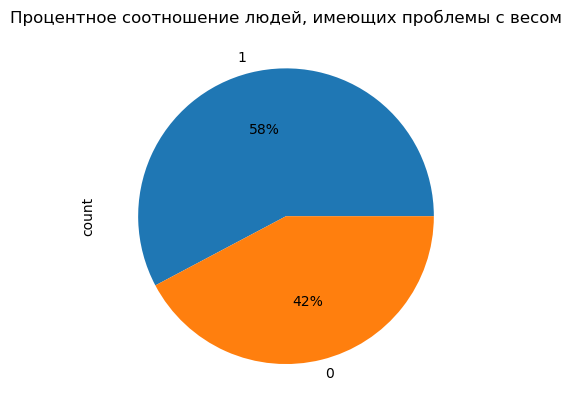

In [22]:

df['BULL BMI Category'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.title('Процентное соотношение людей, имеющих проблемы с весом')
plt.show()

In [23]:
y=df['Quality of Sleep']
x_all=df[['Sleep Duration','Stress Level','Age','Daily Steps','BULL BMI Category']]

x_all=sm.add_constant(x_all)
m_all=sm.OLS(y, x_all).fit()
print(m_all.summary())

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     1088.
Date:                Mon, 10 Jun 2024   Prob (F-statistic):          5.88e-218
Time:                        21:57:01   Log-Likelihood:                -81.501
No. Observations:                 374   AIC:                             175.0
Df Residuals:                     368   BIC:                             198.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.4831      0.33

In [24]:
def f(a):
    if pd.isnull(a):
        return 1
    return 0 
df['BULL Sleep Disorder']=df['Sleep Disorder'].apply(f)

In [25]:
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BULL BMI Category,BULL Sleep Disorder
Person ID,,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,0,1
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,1,1
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,1,1
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,0,0
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0,0
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0,0
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0,0


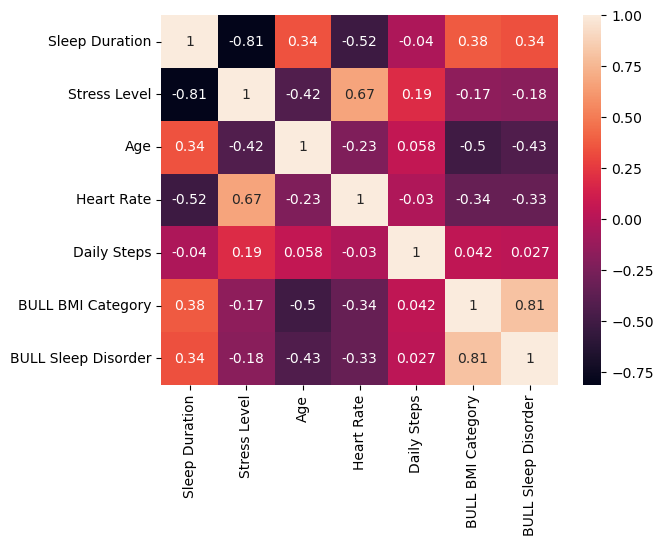

In [26]:
cols = ['Sleep Duration','Stress Level','Age','Heart Rate','Daily Steps','BULL BMI Category','BULL Sleep Disorder']
hm = sns.heatmap(df[cols].corr(),
                 cbar=True,
                 annot=True)

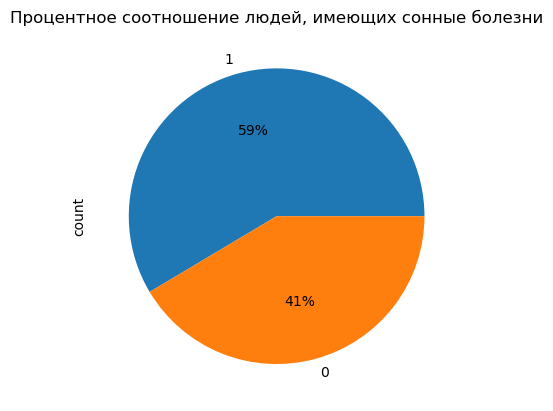

In [27]:
df['BULL Sleep Disorder'].value_counts().plot(kind='pie',autopct='%1.0f%%',)
plt.title('Процентное соотношение людей, имеющих сонные болезни')
plt.show()

In [31]:
y=df['Quality of Sleep']
x_all=df[['Sleep Duration','Stress Level','Age','Daily Steps','Heart Rate','BULL BMI Category','BULL Sleep Disorder']]

x_all=sm.add_constant(x_all)
m_all=sm.OLS(y, x_all).fit()
print(m_all.summary())

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     803.7
Date:                Mon, 10 Jun 2024   Prob (F-statistic):          8.01e-218
Time:                        21:57:36   Log-Likelihood:                -74.666
No. Observations:                 374   AIC:                             165.3
Df Residuals:                     366   BIC:                             196.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.2646    

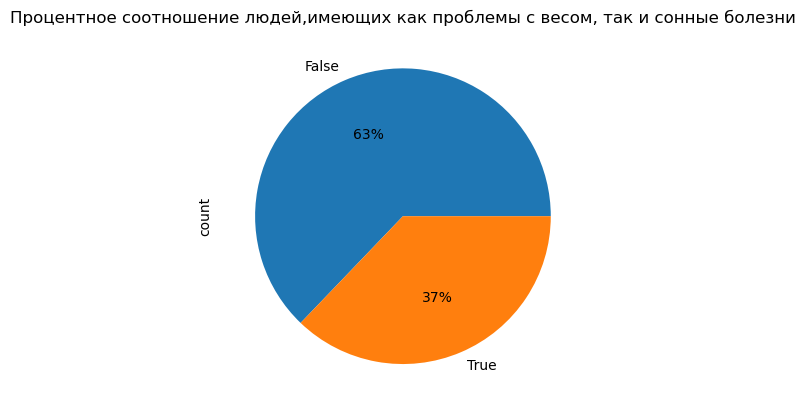

In [29]:
((df['BULL Sleep Disorder']==df['BULL BMI Category'])&(df['BULL Sleep Disorder']==0)).value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.title('Процентное соотношение людей,имеющих как проблемы с весом, так и сонные болезни')
plt.show()

In [30]:
y=df['Quality of Sleep']
x_all=df[['Sleep Duration','Stress Level','Age','Heart Rate','Daily Steps','Physical Activity Level']]

x_all=sm.add_constant(x_all)
m_all=sm.OLS(y, x_all).fit()
print(m_all.summary())

                            OLS Regression Results                            
Dep. Variable:       Quality of Sleep   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     611.7
Date:                Mon, 10 Jun 2024   Prob (F-statistic):          1.14e-187
Time:                        21:57:01   Log-Likelihood:                -149.01
No. Observations:                 374   AIC:                             312.0
Df Residuals:                     367   BIC:                             339.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     